In [56]:
# Importage
import warnings
warnings.filterwarnings('ignore')

# os stuff
import os
import sys

import nibabel as nib
from nilearn.plotting import plot_surf, plot_surf_stat_map, plot_roi, plot_anat, plot_surf_roi
from nilearn.image import index_img

import seaborn as sns

# whobpyt stuff
import whobpyt
from whobpyt.data.dataload import dataloader
# from whobpyt.models.jansen_rit import RNNJANSEN
from whobpyt.models.wong_wang import RNNRWW
from whobpyt.datatypes.modelparameters import ParamsModel
from whobpyt.optimization.modelfitting import Model_fitting

# array and pd stuff
import numpy as np
import pandas as pd

# viz stuff
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

In [3]:
import seaborn as sns
import scipy.stats as stats

In [4]:
import pickle

In [5]:
parcs = np.arange(0,200,1)

mask = np.tril_indices(len(parcs), -1)

# Labels
_label_file =  '/external/rprshnas01/kcni/hharita/Code/whobpyt/scratch/Schaefer200_7_Ntwx_labels.txt'

f = open(_label_file, "r")
q = f.read()
q = q.rsplit('\n')
# del q[-32:]
labels = q.copy()
labels = np.array(labels)
labels = labels[parcs]


In [6]:
import re

In [7]:
folder_one_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_II'
folder_two_path = SCs_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Improved_WWD_HCP_model_runs/All_Subs_SC_Wts/Davide_HCP_Data_Matrix'

# Get the list of files in each folder
folder_one_files = os.listdir(folder_one_path)
folder_two_files = os.listdir(folder_two_path)

# Extract the numbers from the filenames in folder_one
folder_one_numbers = []
for file in folder_one_files:
    match = re.search(r'\d+', file)
    if match:
        folder_one_numbers.append(int(match.group()))

# Extract the numbers from the filenames in folder_two
folder_two_numbers = []
for file in folder_two_files:
    match = re.search(r'\d+', file)
    if match:
        folder_two_numbers.append(int(match.group()))

# Find the common numbers between the two folders
common_numbers = list(set(folder_one_numbers) & set(folder_two_numbers))

sub_list = common_numbers.copy()

sub_list.sort()

sub_list = sub_list[0:200]

In [8]:
pconn_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_II/'

In [9]:
def emp_fc(sub_id):
    pconn1LR = pconn_path + '{0}_rfMRI_REST1_RL_Schaefer200_cifti_parcellated.ptseries.nii'.format(sub_id)
    pconn_img1LR = nib.load(pconn1LR)
    pconn_dat1LR = pconn_img1LR.get_data()
    pconn_dat1LR = pconn_dat1LR/1
    return pconn_dat1LR

In [10]:
%%time

all_subs_emp_fc = []
for i in range(len(sub_list)):
    ss_emp_fc = emp_fc(sub_list[i])
    all_subs_emp_fc.append(ss_emp_fc)

CPU times: user 1min 4s, sys: 437 ms, total: 1min 4s
Wall time: 1min 41s


In [11]:
%%time
all_subs_emp_fc_mat = []
for i in range(200):
    all_subs_emp_fc_mat.append(np.corrcoef(all_subs_emp_fc[i].T))

CPU times: user 1.39 s, sys: 79.3 ms, total: 1.46 s
Wall time: 1.46 s


In [12]:
og_whobpyt_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_run'
lesion_whobpyt_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/Ntwx_Lesion_WhoBPyT_200_subs'

In [13]:
pkl_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_run_pkls'

In [228]:
Ntwx_resilience_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_run_Ntwx_Resilience_II'

In [229]:
ntwx = ['vis','smt','dan','van','lim','fpn','dmn']

In [230]:
def func_to_load_ntwx_resilience_lists(sub_id,ntwx):
    resilience_file = Ntwx_resilience_path + '/{0}_list_of_{1}_ntwx_resilience_fc.txt'.format(sub_id,ntwx)
    load_res_file = np.loadtxt(resilience_file)
    
    return load_res_file
    

In [231]:
# Load the subs resilience files for each ntwx

In [232]:
# 131217_list_of_vis_ntwx_resilience_fc.txt

In [233]:
vis_ntwx_resilience_all_subs = []

for i in range(200):
    sub_id = sub_list[i]
    ss_vis_res_list = func_to_load_ntwx_resilience_lists(sub_id,'vis')
    vis_ntwx_resilience_all_subs.append(ss_vis_res_list)
    
vis_ntwx_resilience_all_subs_mean = np.mean(vis_ntwx_resilience_all_subs, axis=0)

In [234]:
smt_ntwx_resilience_all_subs = []

for i in range(200):
    sub_id = sub_list[i]
    ss_smt_res_list = func_to_load_ntwx_resilience_lists(sub_id,'smt')
    smt_ntwx_resilience_all_subs.append(ss_smt_res_list)
    
smt_ntwx_resilience_all_subs_mean = np.mean(smt_ntwx_resilience_all_subs, axis=0)

In [235]:
dan_ntwx_resilience_all_subs = []

for i in range(200):
    sub_id = sub_list[i]
    ss_dan_res_list = func_to_load_ntwx_resilience_lists(sub_id,'dan')
    dan_ntwx_resilience_all_subs.append(ss_dan_res_list)
    
dan_ntwx_resilience_all_subs_mean = np.mean(dan_ntwx_resilience_all_subs, axis=0)

In [236]:
van_ntwx_resilience_all_subs = []

for i in range(200):
    sub_id = sub_list[i]
    ss_van_res_list = func_to_load_ntwx_resilience_lists(sub_id,'van')
    van_ntwx_resilience_all_subs.append(ss_van_res_list)
    
van_ntwx_resilience_all_subs_mean = np.mean(van_ntwx_resilience_all_subs, axis=0)

In [237]:
lim_ntwx_resilience_all_subs = []

for i in range(200):
    sub_id = sub_list[i]
    ss_lim_res_list = func_to_load_ntwx_resilience_lists(sub_id,'lim')
    lim_ntwx_resilience_all_subs.append(ss_lim_res_list)
    
lim_ntwx_resilience_all_subs_mean = np.mean(lim_ntwx_resilience_all_subs, axis=0)

In [238]:
fpn_ntwx_resilience_all_subs = []

for i in range(200):
    sub_id = sub_list[i]
    ss_fpn_res_list = func_to_load_ntwx_resilience_lists(sub_id,'fpn')
    fpn_ntwx_resilience_all_subs.append(ss_fpn_res_list)
    
fpn_ntwx_resilience_all_subs_mean = np.mean(fpn_ntwx_resilience_all_subs, axis=0)

In [239]:
dmn_ntwx_resilience_all_subs = []

for i in range(200):
    sub_id = sub_list[i]
    ss_dmn_res_list = func_to_load_ntwx_resilience_lists(sub_id,'dmn')
    dmn_ntwx_resilience_all_subs.append(ss_dmn_res_list)
    
dmn_ntwx_resilience_all_subs_mean = np.mean(dmn_ntwx_resilience_all_subs, axis=0)

In [240]:
data_lists = [vis_ntwx_resilience_all_subs_mean,
smt_ntwx_resilience_all_subs_mean,
dan_ntwx_resilience_all_subs_mean,
van_ntwx_resilience_all_subs_mean,
lim_ntwx_resilience_all_subs_mean,
fpn_ntwx_resilience_all_subs_mean,
dmn_ntwx_resilience_all_subs_mean]

In [241]:
data_lists[0]

array([0.47685339, 0.43644252, 0.42028693, 0.41114365, 0.39545154,
       0.38179554, 0.36986245, 0.35671727, 0.34321641, 0.33038389,
       0.31657108, 0.30619474, 0.29362545, 0.28185695, 0.27089923,
       0.26199414, 0.25058207, 0.24149647, 0.23049881, 0.22308338,
       0.21381452, 0.20516084, 0.19872903, 0.19139085, 0.18476419,
       0.17771385, 0.174298  , 0.16745983, 0.16468367, 0.15986789])

In [242]:
x_axis_vals = np.arange(0,101,10)

In [243]:
x_axis_vals

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [244]:
# %%time
# all_ntwx_x_vals = []
# for i in range(7):
#     step = 100/(len(data_lists[i])-1)
#     ntwx_x_vals = np.arange(0,101,step)
#     all_ntwx_x_vals.append(ntwx_x_vals)
#     del step

In [245]:
# Hex color codes for the lines
hex_codes = ['#781286', '#4682B4', '#00760E', '#C43AFA', '#DCF8A4', '#E69422', '#CD3E4E']

In [246]:
# for i in range(7):
#     print(len(all_ntwx_x_vals[i]))

In [247]:
data_lists

[array([0.47685339, 0.43644252, 0.42028693, 0.41114365, 0.39545154,
        0.38179554, 0.36986245, 0.35671727, 0.34321641, 0.33038389,
        0.31657108, 0.30619474, 0.29362545, 0.28185695, 0.27089923,
        0.26199414, 0.25058207, 0.24149647, 0.23049881, 0.22308338,
        0.21381452, 0.20516084, 0.19872903, 0.19139085, 0.18476419,
        0.17771385, 0.174298  , 0.16745983, 0.16468367, 0.15986789]),
 array([0.37346785, 0.35829717, 0.3547545 , 0.34773405, 0.34286572,
        0.33768005, 0.33261141, 0.32367433, 0.32275367, 0.31516073,
        0.30885696, 0.30268255, 0.29852753, 0.29137952, 0.28500022,
        0.27757714, 0.27763241, 0.26866734, 0.26313796, 0.25860966,
        0.2537473 , 0.24962383, 0.24319904, 0.23944418, 0.23430844,
        0.22885602, 0.22303975, 0.21989935, 0.21518985, 0.21186929,
        0.20600251, 0.20344315, 0.19888365, 0.19739272, 0.19131452,
        0.1898996 ]),
 array([0.42835028, 0.41305953, 0.40473911, 0.3947604 , 0.38765449,
        0.3791315 , 0.36

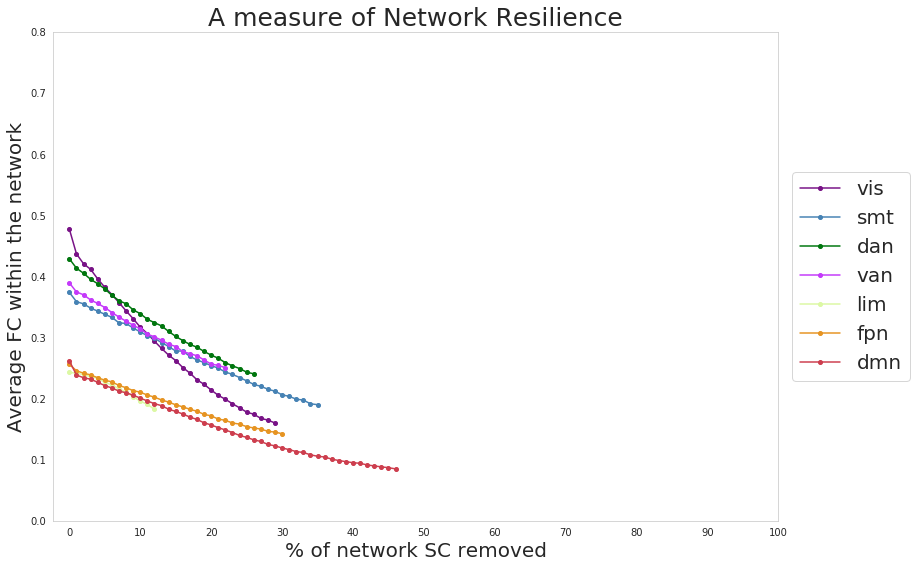

In [249]:
sns.set_style('whitegrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(13,9))
for i in range(7):
    
    ax.plot(data_lists[i], color=hex_codes[i], marker='o', linestyle='-', markersize=4)

# Set the y-axis range from 0 to 1
ax.set_ylim(0, 0.8)

plt.xlabel('% of network SC removed', fontsize=20)
plt.ylabel('Average FC within the network', fontsize=20)
plt.title('A measure of Network Resilience',fontsize=25)
plt.legend(ntwx,bbox_to_anchor=[1.1, 0.5], loc='center',prop={'size': 20})
plt.xticks(x_axis_vals)
# Show the plot
plt.grid(False)

plt.show()

In [83]:
for i in range(7):
    diff = data_lists[i][0] - data_lists[i][10]
    print(diff)

0.31855637126822256
0.18239971296769317
0.1895633972855662
0.13878528981851862
0.060010106537709246
0.1128546322946393
0.17649429358607954


In [35]:
# 200_subjects_WhoBPyT_run_Ntwx_Resilience --> mean_fc = lh+rh+(lhrh+rhlh)/2 (high values)
# 200_subjects_WhoBPyT_run_Ntwx_Resilience_II --> mean_fc = (lh+rh)/2+(lhrh+rhlh)/2 (medium values)
# 200_subjects_WhoBPyT_run_Ntwx_Resilience_III --> mean_fc = (lh+rh+lhrh+rhlh)/4 (low values)

### Measuring the resilience at each step (i.e., decrease)

In [98]:
data_lists[0]

array([0.47685339, 0.41020715, 0.37051476, 0.32892674, 0.29314182,
       0.27189341, 0.24189947, 0.21312792, 0.19111594, 0.1727672 ,
       0.15829702])

#### original values

In [200]:
rate_of_decrease_percentage_all = []
for i in range(7):
    values = data_lists[i]
    # Calculate the rate of decrease as a percentage change between consecutive values
    rate_of_decrease_percentage = [((-values[0] + values[i+1]) / values[0]) * 100 for i in range(len(values) - 1)]
    rate_of_decrease_percentage_all.append(rate_of_decrease_percentage)
    # Now, 'rate_of_decrease_percentage' is a list of percentage changes between consecutive values
    print('{0} Ntwx'.format(ntwx[i]))
    print('decrease %')
    print(rate_of_decrease_percentage)
    print(np.mean(rate_of_decrease_percentage))
    print('----------------------------------- \n')

vis Ntwx
decrease %
[-13.976253156311632, -22.300067854994342, -31.021411337710582, -38.5257976403991, -42.98175997860338, -49.2717310583611, -55.305357915611765, -59.921447092662284, -63.769325078636015, -66.80383910618445]
-44.38769902194747
----------------------------------- 

smt Ntwx
decrease %
[-8.201338733310429, -12.049196403943977, -17.23261459000791, -23.761051337833173, -29.544726874945948, -33.33100145166818, -37.203601302919594, -42.03888407047566, -46.7354848384553, -48.83946798076818]
-29.893736758432834
----------------------------------- 

dan Ntwx
decrease %
[-7.809371535034519, -11.745057062726772, -17.658306648760863, -21.24315939512541, -25.948306169281466, -30.55889294899341, -34.33904767025129, -38.67704960003136, -41.00728017939501, -44.25429551236204]
-27.324076672196213
----------------------------------- 

van Ntwx
decrease %
[-5.304066453100345, -9.31727627006357, -14.009678662328803, -17.722761349291876, -20.82362535086772, -23.974374634456865, -26.8628468

In [201]:
len(rate_of_decrease_percentage_all)

7

In [202]:
for lst in rate_of_decrease_percentage_all:
    lst.insert(0, 0)

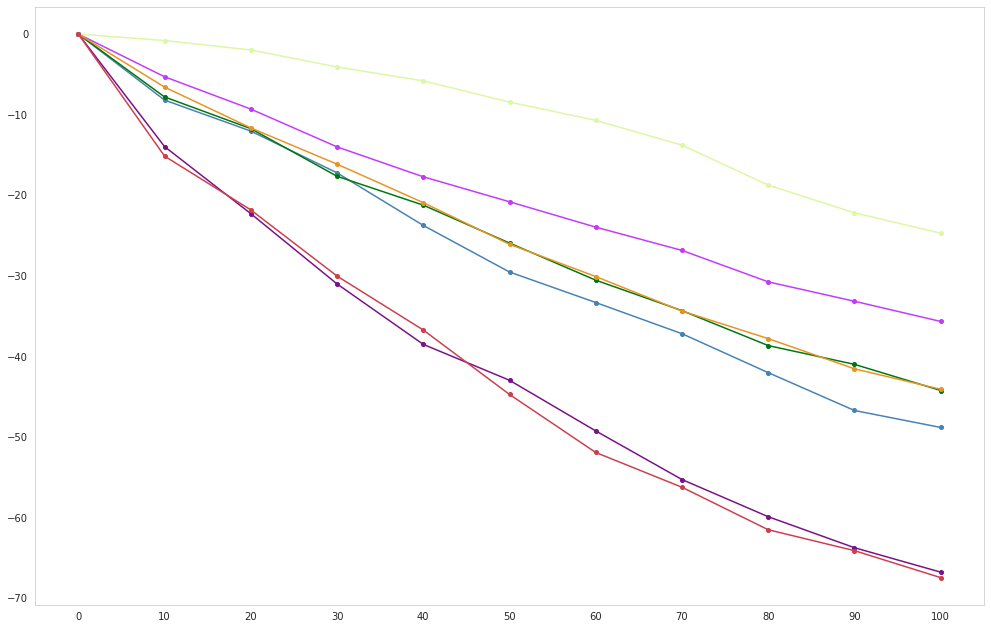

In [203]:
# Hex color codes for the lines
hex_codes = ['#781286', '#4682B4', '#00760E', '#C43AFA', '#DCF8A4', '#E69422', '#CD3E4E']

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(17,11))

for i in range(7):
    
    ax.plot(x_axis_vals,rate_of_decrease_percentage_all[i], color=hex_codes[i], marker='o', linestyle='-', markersize=4,label=ntwx[i])

plt.xticks(x_axis_vals)
# ax.set_ylim(-16, 1)
ax.set_xticks(x_axis_vals)  # Set x-axis ticks
# ax.set_yticks(range(-16, 2, 2))  # Set y-axis ticks
plt.grid(False)
# plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1),fontsize=15)
plt.show()

#### absolute values

In [97]:
rate_of_decrease_percentage_all = []
for i in range(7):
    values = data_lists[i]
    # Calculate the rate of decrease as a percentage change between consecutive values
    rate_of_decrease_percentage = [((values[i + 1] - values[i]) / values[i]) * 100 for i in range(len(values) - 1)]
    rate_of_decrease_percentage_all.append(rate_of_decrease_percentage)
    # Now, 'rate_of_decrease_percentage' is a list of percentage changes between consecutive values
    print('{0} Ntwx'.format(ntwx[i]))
    print('decrease %')
    print(np.abs(rate_of_decrease_percentage))
    print(np.mean(np.abs(rate_of_decrease_percentage)))
    print('----------------------------------- \n')

vis Ntwx
decrease %
[13.97625316  9.67618245 11.22439009 10.87929812  7.24850778 11.0315069
 11.89401291 10.32805939  9.60084062  8.37553823]
10.423458963503379
----------------------------------- 

smt Ntwx
decrease %
[8.20133873 4.19162722 5.89354272 7.88769237 7.58624776 5.37401164
 5.8086966  7.69993641 8.10301992 3.95006532]
6.46961786973538
----------------------------------- 

dan Ntwx
decrease %
[7.80937154 4.26907332 6.70019082 4.3536301  5.9742706  6.22617329
 5.44368441 6.60666922 3.79993227 5.50409498]
5.668709055761871
----------------------------------- 

van Ntwx
decrease %
[5.30406645 4.23799594 5.17452741 4.31802397 3.76879931 3.97940585
 3.79934025 5.33829376 3.47744979 3.75129906]
4.314920178131788
----------------------------------- 

lim Ntwx
decrease %
[0.80807644 1.1803203  2.15039871 1.80146663 2.79766237 2.47719378
 3.44261478 5.75962055 4.22834625 3.25668913]
2.790238895081019
----------------------------------- 

fpn Ntwx
decrease %
[6.58819834 5.42413163 5.0

In [85]:
abs_rate_of_decrease_percentage_all = []
for i in range(7):
    abs_rate_of_decrease_percentage_all.append(np.abs(rate_of_decrease_percentage_all[i]))

In [86]:
abs_rate_of_decrease_percentage_all[0]

array([13.97625316,  9.67618245, 11.22439009, 10.87929812,  7.24850778,
       11.0315069 , 11.89401291, 10.32805939,  9.60084062,  8.37553823])

In [87]:
np.sum(abs_rate_of_decrease_percentage_all[0])

104.23458963503379

In [88]:
np.sum(abs_rate_of_decrease_percentage_all[1])

64.6961786973538

In [89]:
np.sum(abs_rate_of_decrease_percentage_all[2])

56.68709055761872

In [90]:
np.sum(abs_rate_of_decrease_percentage_all[3])

43.149201781317885

In [91]:
np.sum(abs_rate_of_decrease_percentage_all[4])

27.90238895081019

In [92]:
np.sum(abs_rate_of_decrease_percentage_all[5])

56.487194577329305

In [93]:
np.sum(abs_rate_of_decrease_percentage_all[6])

105.92138995762909

In [94]:
abs_rate_of_decrease_percentage_all

[array([13.97625316,  9.67618245, 11.22439009, 10.87929812,  7.24850778,
        11.0315069 , 11.89401291, 10.32805939,  9.60084062,  8.37553823]),
 array([8.20133873, 4.19162722, 5.89354272, 7.88769237, 7.58624776,
        5.37401164, 5.8086966 , 7.69993641, 8.10301992, 3.95006532]),
 array([7.80937154, 4.26907332, 6.70019082, 4.3536301 , 5.9742706 ,
        6.22617329, 5.44368441, 6.60666922, 3.79993227, 5.50409498]),
 array([5.30406645, 4.23799594, 5.17452741, 4.31802397, 3.76879931,
        3.97940585, 3.79934025, 5.33829376, 3.47744979, 3.75129906]),
 array([0.80807644, 1.1803203 , 2.15039871, 1.80146663, 2.79766237,
        2.47719378, 3.44261478, 5.75962055, 4.22834625, 3.25668913]),
 array([6.58819834, 5.42413163, 5.09052303, 5.70157719, 6.5331145 ,
        5.42498938, 6.12706213, 5.21403931, 6.02721154, 4.35634753]),
 array([15.15859795,  7.867423  , 10.50583298,  9.57599235, 12.64526701,
        13.03665222,  8.98768338, 12.05753715,  6.75131816,  9.33508576])]

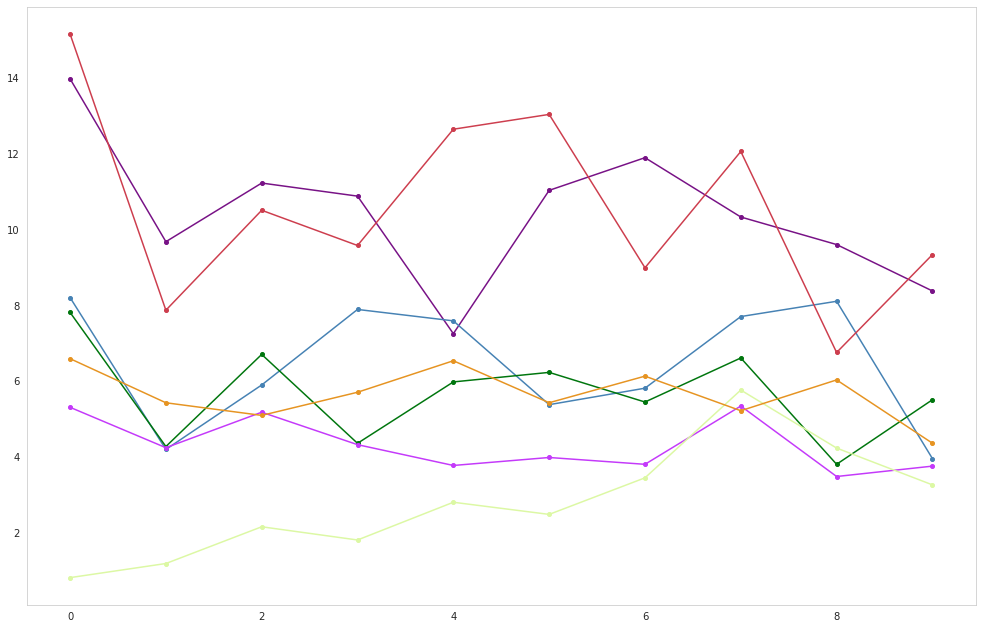

In [103]:
# Hex color codes for the lines
hex_codes = ['#781286', '#4682B4', '#00760E', '#C43AFA', '#DCF8A4', '#E69422', '#CD3E4E']

sns.set_style('whitegrid')
# Create a figure and axis
fig, ax = plt.subplots(figsize=(17,11))

# Iterate through the data lists and hex codes to plot each line
for data, color in zip(abs_rate_of_decrease_percentage_all, hex_codes):
    ax.plot(data, color=color, marker='o', linestyle='-', markersize=4)

# Set the y-axis range from 0 to 1
# ax.set_ylim(-1, 12)

# Show the plot
plt.grid(False)
plt.show()
